In [1]:
from algorithms.AffinityClusteringMPC import AffinityClusteringMPC
from algorithms.Graph import Graph

G = Graph()
G.add_vertex(1)
G.add_vertex(2)
G.add_vertex(3)
G.add_vertex(4)
G.add_vertex(5)
G.add_vertex(6)
G.add_vertex(7)
G.add_vertex(8)
G.add_vertex(9)
G.add_vertex(10)
G.add_edge(1, 7, 8)
G.add_edge(1, 2, 2)
G.add_edge(2, 3, 1)
G.add_edge(2, 6, 8)
G.add_edge(3, 7, 7)
G.add_edge(3, 4, 6)
G.add_edge(3, 6, 7)
G.add_edge(4, 5, 1)
G.add_edge(4, 7, 8)
G.add_edge(4, 10, 5)
G.add_edge(5, 6, 8)
G.add_edge(7, 9, 4)
G.add_edge(8, 7, 3)
G.add_edge(8, 9, 3)
G.add_edge(8, 10, 2)
G.add_edge(10, 9, 4)

In [2]:
alg = AffinityClusteringMPC(G, max_iterations=10, print_graph=True)
alg.run()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/12/25 10:17:48 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


running affinity clustering: max_iterations = 10
	vertices:['(1, {2, 7}) ', '(2, {1, 3, 6}) ', '(3, {2, 4, 6, 7}) ', '(4, {10, 3, 5, 7}) ', '(5, {4, 6}) ', '(6, {2, 3, 5}) ', '(7, {1, 3, 4, 8, 9}) ', '(8, {9, 10, 7}) ', '(9, {8, 10, 7}) ', '(10, {8, 9, 4}) ']
	edges:['((7, 1), 8) ', '((2, 1), 2) ', '((3, 2), 1) ', '((6, 2), 8) ', '((7, 3), 7) ', '((4, 3), 6) ', '((6, 3), 7) ', '((5, 4), 1) ', '((7, 4), 8) ', '((10, 4), 5) ', '((6, 5), 8) ', '((9, 7), 4) ', '((8, 7), 3) ', '((9, 8), 3) ', '((10, 8), 2) ', '((10, 9), 4) ']
round 1


Lambda: {8: 10, 1: 2, 9: 8, 2: 3, 10: 8, 3: 2, 4: 5, 5: 4, 6: 3, 7: 8}
Neighborhoods: {8: {8, 9, 10, 7}, 2: {1, 2, 3, 6}, 4: {4, 5}}
Contracted: {(8, 4): 5, (4, 2): 6, (8, 2): 7}
	vertices:['(8, {2, 4}) ', '(4, {8, 2}) ', '(2, {8, 4}) ']
	edges:['((8, 4), 5) ', '((4, 2), 6) ', '((8, 2), 7) ']
round 2
Lambda: {8: 4, 2: 4, 4: 8}
Neighborhoods: {4: {8, 2, 4}}
Contraction skipped.
	vertices:['(4, {}) ']
	edges:[]


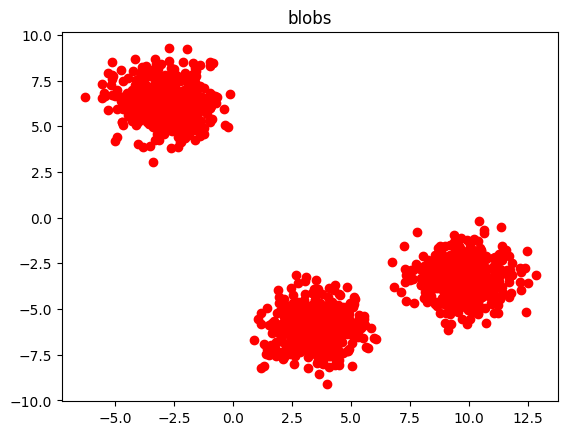

In [2]:
from utils.GraphGenerator import GraphGenerator
from utils.GraphVisualizer import GraphVisualizer
from utils.datasets import generate_points

name = 'blobs'
points = generate_points(name, 1500)
G = GraphGenerator(points.copy()) \
    .to_graph(gen_pair_wise=True)

gv = GraphVisualizer(G, True)
gv.plot_graph(f'{name}')

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/12/25 14:27:19 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


running affinity clustering: max_iterations = 100
round 1


OpenJDK 64-Bit Server VM warning: CodeCache is full. Compiler has been disabled.
OpenJDK 64-Bit Server VM warning: Try increasing the code cache size using -XX:ReservedCodeCacheSize=


CodeCache: size=131072Kb used=8793Kb max_used=8798Kb free=122278Kb
 bounds [0x000000010a98c000, 0x000000010b23c000, 0x000000011298c000]
 total_blobs=3455 nmethods=2832 adapters=539
 compilation: disabled (not enough contiguous free space left)


Lambda: 1500
Neighborhoods: 469


Contracted: 109746
round 2
Lambda: 469
Neighborhoods: 135
Contracted: 9045
round 3
Lambda: 135
Neighborhoods: 32
Contracted: 496
round 4
Lambda: 32
Neighborhoods: 6
Contracted: 15
round 5
Lambda: 6
Neighborhoods: 2
Contracted: 1
round 6
Lambda: 2
Neighborhoods: 1
Contraction skipped.


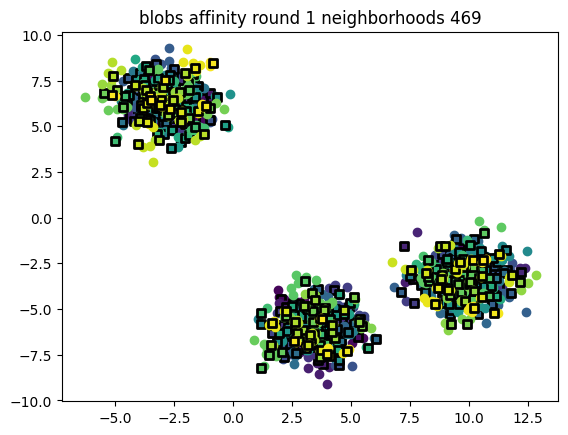

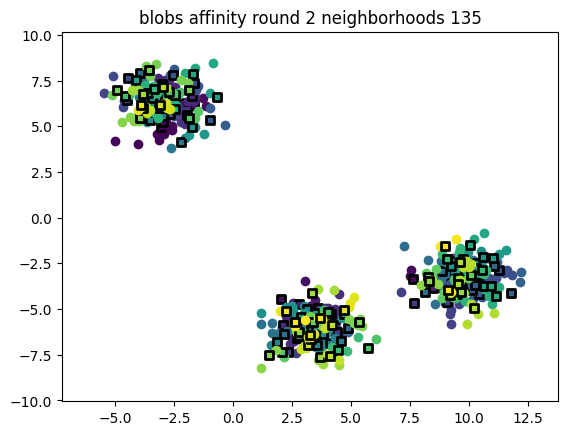

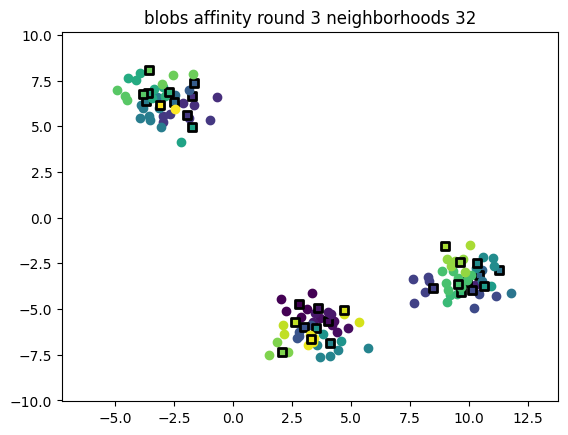

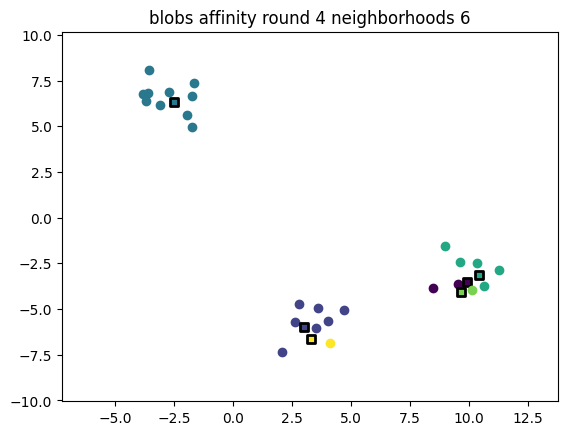

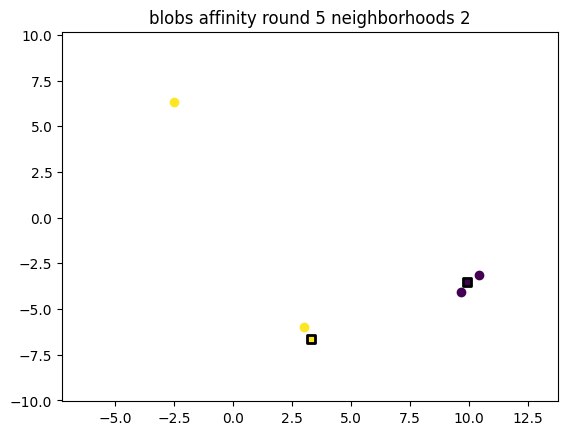

In [3]:
max_iterations = 100
plot_graph = lambda i: gv.plot_neighborhoods(f'{name} affinity round {i}')
alg = AffinityClusteringMPC(G, max_iterations, False, plot_graph)
alg.run()

running boruvkas algorithm: max_iterations = 100
round 1
neighborhoods: ['(518, {0, 1050, 1060, 518, 619, 1009, 794}) ', '(1, {1, 500}) ', '(2, {2, 1370}) ', '(3, {3, 485}) ', '(53, {1219, 4, 53, 951}) ', '(5, {553, 5}) ', '(6, {946, 6, 409, 441}) ', '(7, {177, 7, 1065, 1372}) ', '(8, {498, 935, 8, 699}) ', '(9, {997, 9, 1052, 638}) ', '(10, {121, 89, 10}) ', '(93, {283, 923, 1304, 11, 93}) ', '(12, {1179, 12}) ', '(45, {45, 266, 475, 13}) ', '(14, {14, 303}) ', '(15, {1258, 1019, 15}) ', '(278, {16, 1157, 278}) ', '(528, {528, 17, 1162}) ', '(18, {1345, 18, 151, 252}) ', '(383, {19, 647, 458, 1083, 383}) ', '(1215, {1458, 20, 1215}) ', '(21, {805, 21}) ', '(22, {130, 1363, 1171, 22, 41}) ', '(895, {945, 23, 1223, 1003, 525, 895}) ', '(1209, {516, 199, 681, 846, 1423, 24, 1209, 1407}) ', '(25, {512, 25, 123, 1068, 1197}) ', '(248, {292, 357, 786, 1202, 1366, 886, 248, 26}) ', '(27, {98, 27}) ', '(548, {577, 642, 548, 742, 174, 1111, 1431, 1368, 28}) ', '(29, {29, 1247}) ', '(1066, {105

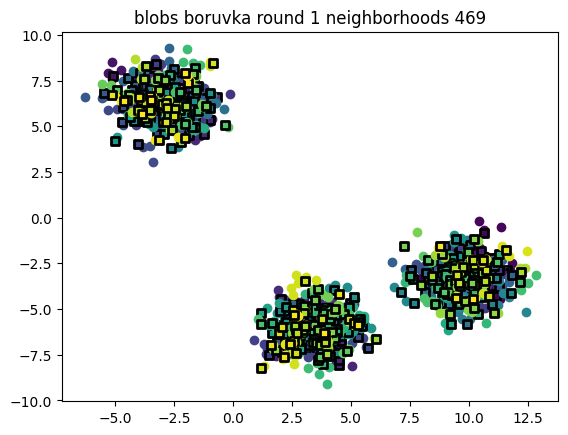

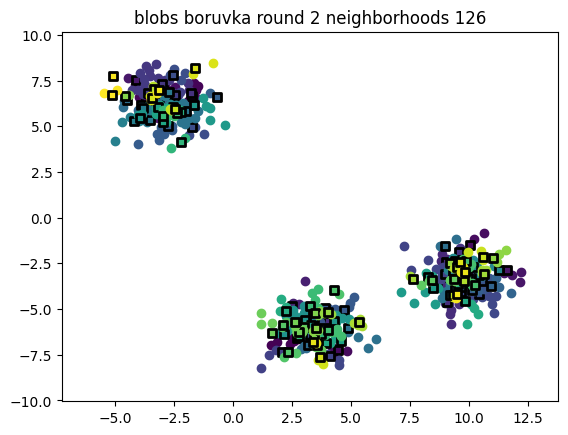

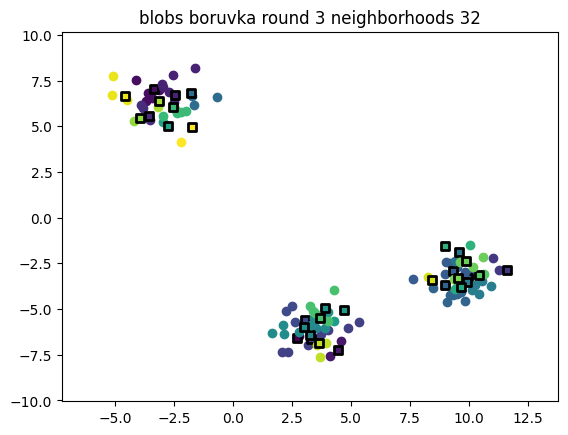

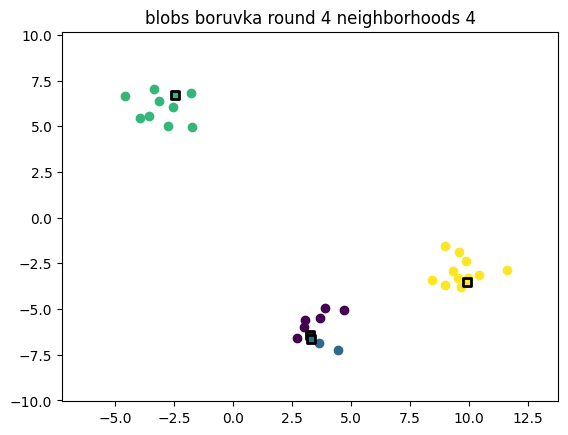

In [3]:
from algorithms.BoruvkasAlgorithm import BoruvkasAlgorithm

max_iterations = 100
plot_graph = lambda i: gv.plot_neighborhoods(f'{name} boruvka round {i}')
alg = BoruvkasAlgorithm(G, max_iterations, False, plot_graph)
_ = alg.run()
